In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout, Flatten
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train) , (x_test, y_test) = mnist.load_data() 
x_train, x_test = x_train/255.0 , x_test/255.0

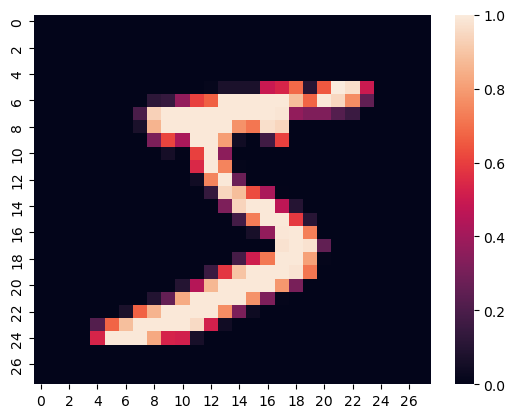

In [3]:
sns.heatmap(x_train[0])
plt.show()

In [4]:
model = Sequential([
Flatten(input_shape=(28,28)),
Dense(128, activation="relu"),
Dropout(0.2),
Dense(10)
])

In [5]:
predictions = model(x_train[:1]).numpy()
predictions

array([[-5.0475734e-01,  3.6056948e-01,  7.0027411e-01,  3.4758171e-01,
         7.3733538e-01, -4.6922869e-04,  6.9669792e-03,  1.5099099e-01,
        -2.8171772e-01,  1.7508927e-01]], dtype=float32)

In [8]:
tf.nn.softmax(predictions).numpy()

array([[0.1756461 , 0.2017028 , 0.13467975, 0.0269628 , 0.06134346,
        0.08080574, 0.1052158 , 0.04704007, 0.129055  , 0.03754851]],
      dtype=float32)

In [9]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [10]:
model.compile(optimizer="adam", loss = loss_fn, metrics=["accuracy"])

In [11]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2977 - accuracy: 0.9132
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1392 - accuracy: 0.9585
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1048 - accuracy: 0.9678
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0865 - accuracy: 0.9731
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0730 - accuracy: 0.9769


In [12]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 1s - loss: 0.0803 - accuracy: 0.9761 - 822ms/epoch - 3ms/step


[0.08027839660644531, 0.9761000275611877]

In [13]:
val = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test),
                batch_size=200)

Epoch 1/5
300/300 [==============================] - 3s 8ms/step - loss: 0.0511 - accuracy: 0.9843 - val_loss: 0.0666 - val_accuracy: 0.9807
Epoch 2/5
300/300 [==============================] - 2s 6ms/step - loss: 0.0455 - accuracy: 0.9857 - val_loss: 0.0653 - val_accuracy: 0.9806
Epoch 3/5
300/300 [==============================] - 2s 5ms/step - loss: 0.0435 - accuracy: 0.9866 - val_loss: 0.0648 - val_accuracy: 0.9811
Epoch 4/5
300/300 [==============================] - 2s 6ms/step - loss: 0.0406 - accuracy: 0.9875 - val_loss: 0.0649 - val_accuracy: 0.9806
Epoch 5/5
300/300 [==============================] - 2s 5ms/step - loss: 0.0407 - accuracy: 0.9876 - val_loss: 0.0652 - val_accuracy: 0.9808


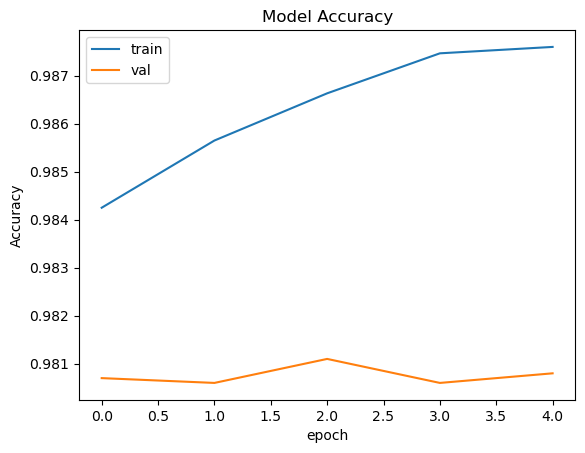

In [14]:
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("epoch")
plt.plot(val.history["accuracy"])
plt.plot(val.history["val_accuracy"])
plt.legend(["train","val"])
plt.show()